In [1]:
# Import packages we've been using all semester long :)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Part 2: Analyzing timestamp data for patterns

### Analyzing my own data

In [2]:
# Importing the playlist data (the dates represent everytime a song was added to a playlist,columns are the names of the playlist)
playlist=pd.read_csv('playlist.csv',encoding = "ISO-8859-1");
playlist
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         157 non-null    int64 
 1   La parguera        33 non-null     object
 2   SOJ                12 non-null     object
 3   Serigne Mor Mbaye  27 non-null     object
 4   Trip               49 non-null     object
 5   Forzoe             157 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.5+ KB


In [3]:
print(playlist.columns.tolist())

['Unnamed: 0', 'La parguera ', 'SOJ', 'Serigne Mor Mbaye', 'Trip ', 'Forzoe']


In [4]:
playlist[['La parguera ','Trip ','SOJ','Serigne Mor Mbaye','Forzoe']] = playlist[['La parguera ','Trip ','SOJ','Serigne Mor Mbaye','Forzoe']].apply(pd.to_datetime)

In [5]:
#Making a new column that represents the time since between a timestamp and the previous one for each playlist

playlist['diff_parguera'] = playlist['La parguera '].diff().fillna(pd.Timedelta(days=0))
playlist['diff_soj'] = playlist['SOJ'].diff().fillna(pd.Timedelta(days=0))
playlist['diff_smm'] = playlist['Serigne Mor Mbaye'].diff().fillna(pd.Timedelta(days=0))
playlist['diff_trip'] = playlist['Trip '].diff().fillna(pd.Timedelta(days=0))
playlist['diff_forzoe'] = playlist['Forzoe'].diff().fillna(pd.Timedelta(days=0))

playlist

,Unnamed: 0,La parguera,SOJ,Serigne Mor Mbaye,Trip,Forzoe,diff_parguera,diff_soj,diff_smm,diff_trip,diff_forzoe
0,0,2022-01-08,2021-12-15,2021-01-05,2021-01-02,2020-07-18,0 days,0 days,0 days,0 days,0 days
1,1,2022-01-08,2021-12-15,2021-01-05,2021-01-02,2020-07-18,0 days,0 days,0 days,0 days,0 days
2,2,2022-01-08,2021-12-15,2021-01-05,2021-01-02,2020-07-18,0 days,0 days,0 days,0 days,0 days
3,3,2022-01-08,2021-12-15,2021-01-05,2021-01-02,2020-07-18,0 days,0 days,0 days,0 days,0 days
4,4,2022-01-09,2021-12-15,2021-01-05,2021-01-02,2020-07-18,1 days,0 days,0 days,0 days,0 days
...,...,...,...,...,...,...,...,...,...,...,...
152,152,NaT,NaT,NaT,NaT,2020-07-18,0 days,0 days,0 days,0 days,0 days
153,153,NaT,NaT,NaT,NaT,2020-07-18,0 days,0 days,0 days,0 days,0 days
154,154,NaT,NaT,NaT,NaT,2020-07-18,0 days,0 days,0 days,0 days,0 days
155,155,NaT,NaT,NaT,NaT,2020-07-18,0 days,0 days,0 days,0 days,0 days


From line 80 to 84: The longest timestanps accross all playlist is 168 days for the playlist titled 'Serigne Mor Mbaye'

In [6]:
print(playlist['diff_parguera'].max())


1 days 00:00:00


print(playlist['diff_soj'].max())

In [7]:
print(playlist['diff_smm'].max())

168 days 00:00:00


In [8]:
print(playlist['diff_trip'].max())

1 days 00:00:00


In [9]:
print(playlist['diff_forzoe'].max())

0 days 00:00:00


In [10]:
The following code calculates the average time between timestamps accross all playlists.

SyntaxError: invalid syntax (2026984726.py, line 1)

In [ ]:
avg_time_diff_smm = (playlist['diff_smm'].max() - playlist['diff_smm'].min()) / (len(playlist) - 1)
avg_time_diff_smm

In [ ]:
avg_time_diff_soj = (playlist['diff_soj'].max() - playlist['diff_soj'].min()) / (len(playlist) - 1)
avg_time_diff_soj

In [ ]:
avg_time_diff_trip = (playlist['diff_trip'].max() - playlist['diff_trip'].min()) / (len(playlist) - 1)
avg_time_diff_trip

In [ ]:
avg_time_diff_forzoe = (playlist['diff_forzoe'].max() - playlist['diff_forzoe'].min()) / (len(playlist) - 1)
avg_time_diff_forzoe

In [ ]:
avg_time_diff_parguera = (playlist['diff_parguera'].max() - playlist['diff_parguera'].min()) / (len(playlist) - 1)
avg_time_diff_parguera

In [ ]:
# create a new column with the day of each timestamp focusing one on playlist

playlist['day'] = playlist['Serigne Mor Mbaye'].dt.day

playlist
# count the number of events for each month
event_count1 = playlist.groupby('day').size()

# find the month with the most events and the number of events on that month
most_events_day = event_count1.idxmax()
most_events_day_count = event_count1.max()
most_events_day


In [ ]:
most_events_day_count

In [ ]:
# create a new column with the month of each timestamp focusing one on playlist

playlist['month'] = playlist['Serigne Mor Mbaye'].dt.month

playlist
# count the number of events for each month
event_count = playlist.groupby('month').size()

# find the month with the most events and the number of events on that month
most_events_month = event_count.idxmax()
most_events_count = event_count.max()
most_events_month


The month with the most events is January with 25 events.

### Analyzing my partner's data

In [12]:

df_partner=pd.read_csv('df_partner.txt')

df_partner['date']=df_partner['date'].apply(pd.to_datetime)

df_partner


,Unnamed: 0,date
0,1,2022-12-03 02:46:29+00:00
1,2,2022-12-03 15:56:24+00:00
2,3,2022-12-03 15:56:25+00:00
3,4,2022-12-03 20:12:47+00:00
4,5,2022-12-03 21:23:21+00:00
...,...,...
412,413,2023-03-12 16:32:25+00:00
413,414,2023-03-12 17:39:22+00:00
414,415,2023-03-12 18:59:41+00:00
415,416,2023-03-12 19:59:53+00:00


In [16]:
 #Calculate the time since the previous timestamp
df_partner['time_since_last'] = df_partner['date'].diff().dt.total_seconds()
df_partner

,Unnamed: 0,date,time_since_last
0,1,2022-12-03 02:46:29+00:00,NaN
1,2,2022-12-03 15:56:24+00:00,47395.0
2,3,2022-12-03 15:56:25+00:00,1.0
3,4,2022-12-03 20:12:47+00:00,15382.0
4,5,2022-12-03 21:23:21+00:00,4234.0
...,...,...,...
412,413,2023-03-12 16:32:25+00:00,70032.0
413,414,2023-03-12 17:39:22+00:00,4017.0
414,415,2023-03-12 18:59:41+00:00,4819.0
415,416,2023-03-12 19:59:53+00:00,3612.0


In [18]:
# Find the longest time between timestamps
longest_time = df_partner['time_since_last'].max()

# Find the average time between timestamps
avg_time = df_partner['time_since_last'].mean()

df_partner

,Unnamed: 0,date,time_since_last
0,1,2022-12-03 02:46:29+00:00,NaN
1,2,2022-12-03 15:56:24+00:00,47395.0
2,3,2022-12-03 15:56:25+00:00,1.0
3,4,2022-12-03 20:12:47+00:00,15382.0
4,5,2022-12-03 21:23:21+00:00,4234.0
...,...,...,...
412,413,2023-03-12 16:32:25+00:00,70032.0
413,414,2023-03-12 17:39:22+00:00,4017.0
414,415,2023-03-12 18:59:41+00:00,4819.0
415,416,2023-03-12 19:59:53+00:00,3612.0


In [20]:
# Extract the day and month from the 'data' column
df_partner['day'] = df_partner['date'].dt.date
df_partner['month'] = df_partner['date'].dt.strftime('%Y-%m')

# Find the day with the most timestamps
day_counts = df_partner['day'].value_counts()
max_day = day_counts.idxmax()
max_day_count = day_counts.max()



10


In [19]:
# Find the month with the most timestamps
month_counts = df_partner['month'].value_counts()
max_month = month_counts.idxmax()
max_month_count = month_counts.max()

In [21]:
print('Day with the most timestamps: {}'.format(max_day))
print('Number of events on that day: {}'.format(max_day_count))
print('Month with the most timestamps: {}'.format(max_month))
print('Number of events on that month: {}'.format(max_month_count))

Day with the most timestamps: 2023-01-14
Number of events on that day: 10
Month with the most timestamps: 2023-02
Number of events on that month: 144


I think the data could be from a website that Grayson visits very often during a day and is quite reliant on. My guess is a search engine. 

Graeson analysis was a goog guess. My data comes from a streaming platform (spotify) nstead of a movie website. It tracks the endtime of every song I have streamed on spotify.

Since the day with the most timestamps was during winter break, I am assuming Grayson had a lot of time to visit the website and browse. 

The month with the most timestamps was February of this year. Since that is the coldest month of the year, I assume Graeson spent more time than usual indoors, which could explain the increased activity.

I have learned that Graeson is very reliant on the app/website.


# Part 4: Analyze and visualize an additional element from  your personal data

In [90]:
#Importing data with streaming timestamps

streaming=pd.read_csv('endTime.csv')
streaming

,Unnamed: 0,endTime
0,0,2022-09-26 20:41
1,1,2022-09-26 20:46
2,2,2022-09-26 20:49
3,3,2022-09-26 20:52
4,4,2022-09-26 20:57
...,...,...
8881,8881,2023-03-07 20:51
8882,8882,2023-03-07 20:51
8883,8883,2023-03-07 20:51
8884,8884,2023-03-07 20:51


In [91]:
# convert the datetime column to a datetime data type
streaming['endTime'] = pd.to_datetime(streaming['endTime'])

# create new columns for date and time components
streaming['date'] = streaming['endTime'].dt.date
streaming['time'] = streaming['endTime'].dt.time

print(streaming)

      Unnamed: 0             endTime        date      time
0              0 2022-09-26 20:41:00  2022-09-26  20:41:00
1              1 2022-09-26 20:46:00  2022-09-26  20:46:00
2              2 2022-09-26 20:49:00  2022-09-26  20:49:00
3              3 2022-09-26 20:52:00  2022-09-26  20:52:00
4              4 2022-09-26 20:57:00  2022-09-26  20:57:00
...          ...                 ...         ...       ...
8881        8881 2023-03-07 20:51:00  2023-03-07  20:51:00
8882        8882 2023-03-07 20:51:00  2023-03-07  20:51:00
8883        8883 2023-03-07 20:51:00  2023-03-07  20:51:00
8884        8884 2023-03-07 20:51:00  2023-03-07  20:51:00
8885        8885 2023-03-07 20:54:00  2023-03-07  20:54:00

[8886 rows x 4 columns]


In [92]:
# create a new column with the month of each timestamp
streaming['month'] = streaming['endTime'].dt.month

# count the number of events for each month
event_count = streaming.groupby('month').size()

# find the month with the most events
most_events_month = event_count.idxmax()

most_events_month

2

In [93]:
# I am curious about the time of the day at which most streams occur. With the following codes, I create a dummy variable that takes value 1 if streaming occured before noon and 0 otherwise
streaming['time_of_day'] = streaming['endTime'].apply(lambda x: 1 if x.hour < 12 else 0)
streaming

,Unnamed: 0,endTime,date,time,month,time_of_day
0,0,2022-09-26 20:41:00,2022-09-26,20:41:00,9,0
1,1,2022-09-26 20:46:00,2022-09-26,20:46:00,9,0
2,2,2022-09-26 20:49:00,2022-09-26,20:49:00,9,0
3,3,2022-09-26 20:52:00,2022-09-26,20:52:00,9,0
4,4,2022-09-26 20:57:00,2022-09-26,20:57:00,9,0
...,...,...,...,...,...,...
8881,8881,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0
8882,8882,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0
8883,8883,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0
8884,8884,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0


In [94]:
count_before_noon = (streaming['time_of_day'] == 1).sum()
count_before_noon

4480

4480 streams occured before noon.

In [95]:
count_after_noon = (streaming['time_of_day'] == 0).sum()
count_after_noon

4406

4406 occured after noon.

In [96]:
# creating a new column with the number of streams for each month

streaming['events_per_month'] = streaming.groupby('month')['month'].transform('count')
streaming

,Unnamed: 0,endTime,date,time,month,time_of_day,events_per_month
0,0,2022-09-26 20:41:00,2022-09-26,20:41:00,9,0,378
1,1,2022-09-26 20:46:00,2022-09-26,20:46:00,9,0,378
2,2,2022-09-26 20:49:00,2022-09-26,20:49:00,9,0,378
3,3,2022-09-26 20:52:00,2022-09-26,20:52:00,9,0,378
4,4,2022-09-26 20:57:00,2022-09-26,20:57:00,9,0,378
...,...,...,...,...,...,...,...
8881,8881,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0,695
8882,8882,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0,695
8883,8883,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0,695
8884,8884,2023-03-07 20:51:00,2023-03-07,20:51:00,3,0,695


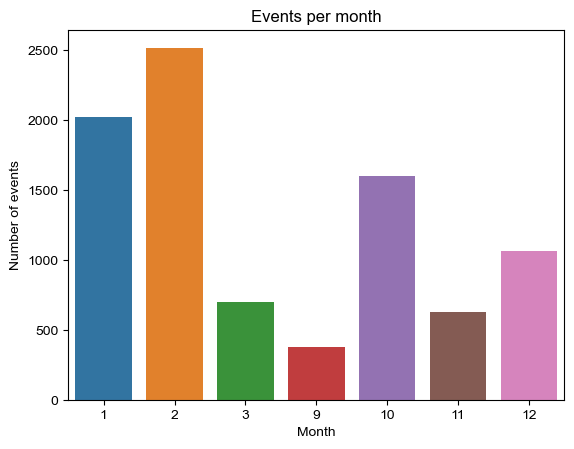

In [97]:
#Plotting the number of streams per month

sns.barplot(data=streaming, x='month', y='events_per_month')
sns.set_style('whitegrid')
plt.xlabel('Month')
plt.ylabel('Number of events')
plt.title('Events per month')
plt.show()